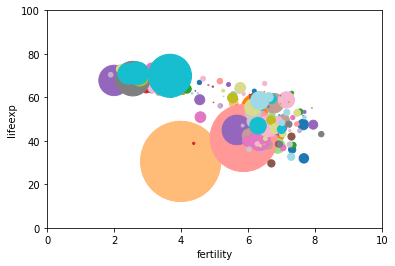

<Figure size 432x288 with 0 Axes>

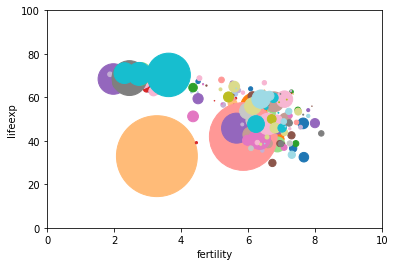

<Figure size 432x288 with 0 Axes>

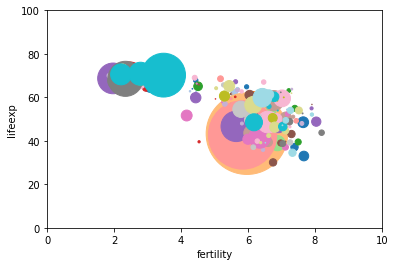

<Figure size 432x288 with 0 Axes>

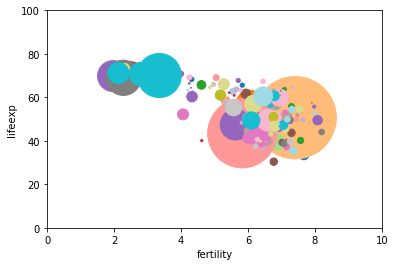

<Figure size 432x288 with 0 Axes>

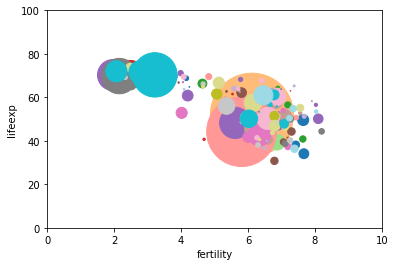

<Figure size 432x288 with 0 Axes>

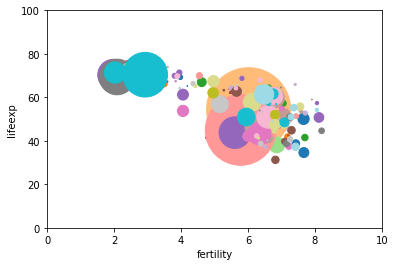

<Figure size 432x288 with 0 Axes>

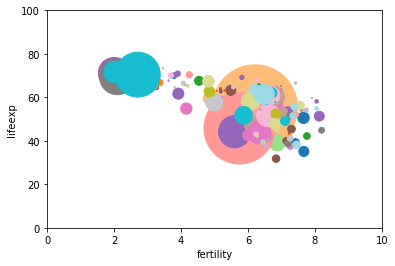

<Figure size 432x288 with 0 Axes>

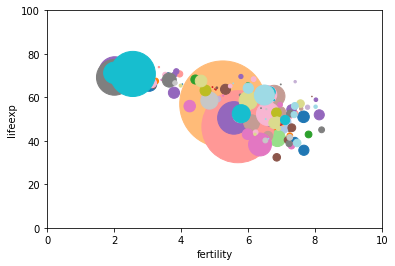

<Figure size 432x288 with 0 Axes>

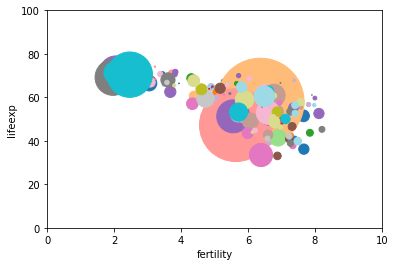

<Figure size 432x288 with 0 Axes>

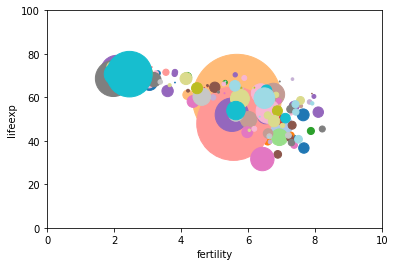

<Figure size 432x288 with 0 Axes>

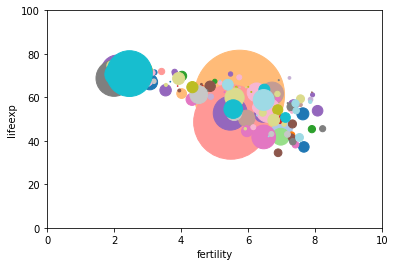

<Figure size 432x288 with 0 Axes>

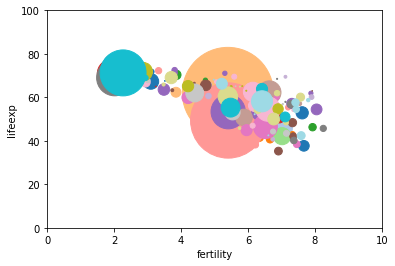

<Figure size 432x288 with 0 Axes>

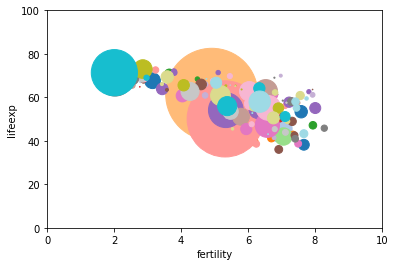

<Figure size 432x288 with 0 Axes>

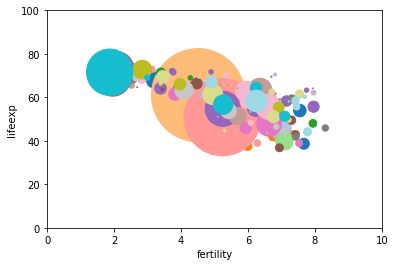

<Figure size 432x288 with 0 Axes>

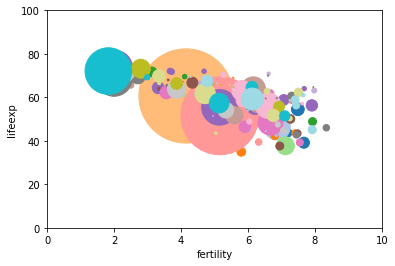

<Figure size 432x288 with 0 Axes>

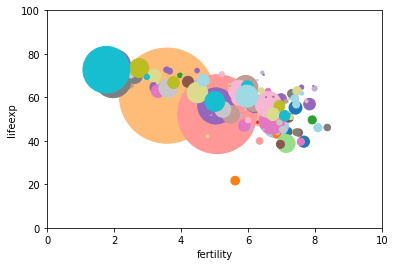

<Figure size 432x288 with 0 Axes>

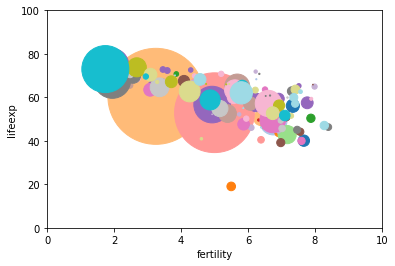

<Figure size 432x288 with 0 Axes>

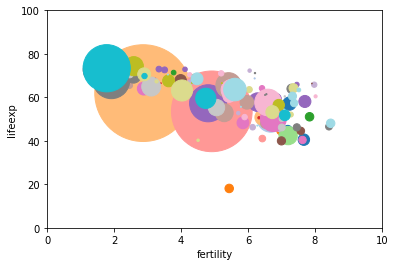

<Figure size 432x288 with 0 Axes>

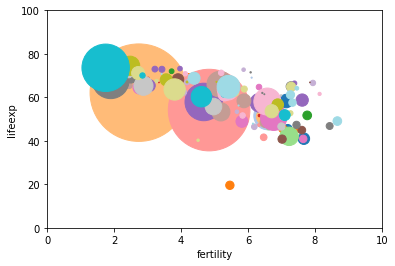

<Figure size 432x288 with 0 Axes>

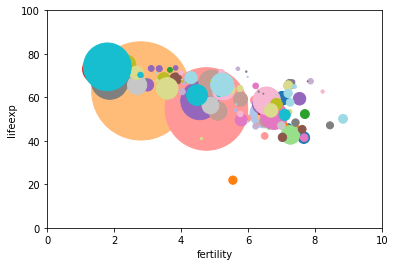

<Figure size 432x288 with 0 Axes>

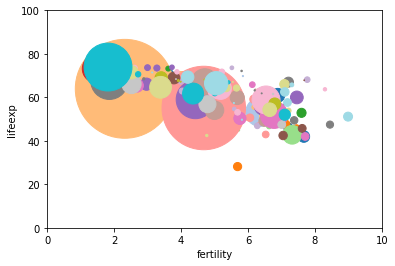

<Figure size 432x288 with 0 Axes>

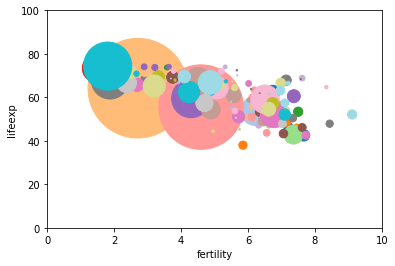

<Figure size 432x288 with 0 Axes>

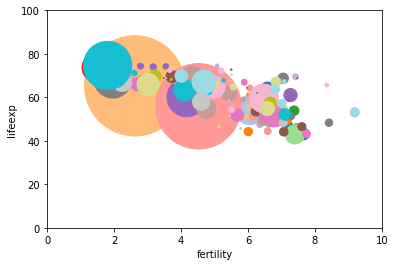

<Figure size 432x288 with 0 Axes>

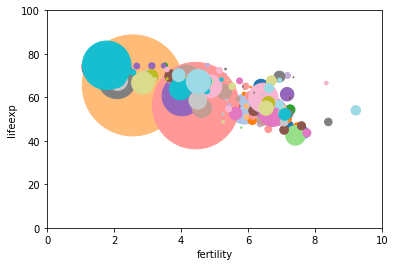

<Figure size 432x288 with 0 Axes>

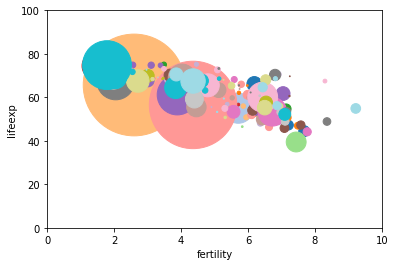

<Figure size 432x288 with 0 Axes>

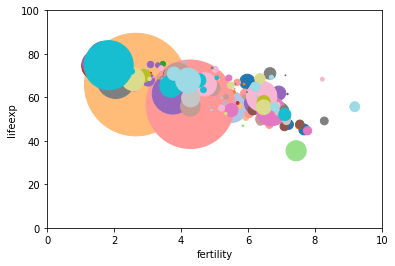

<Figure size 432x288 with 0 Axes>

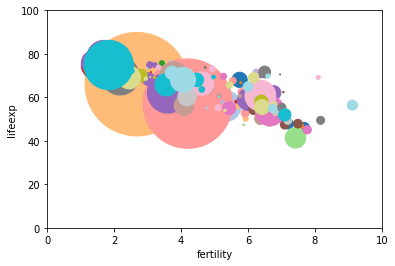

<Figure size 432x288 with 0 Axes>

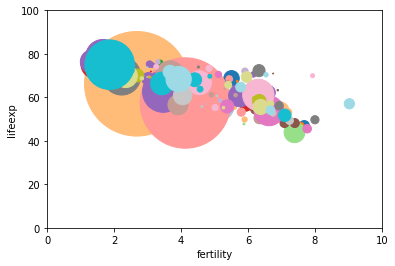

<Figure size 432x288 with 0 Axes>

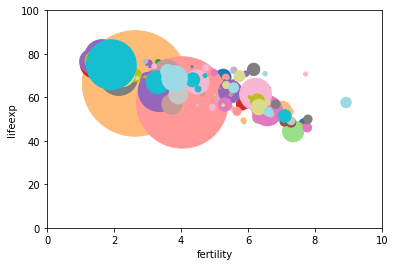

<Figure size 432x288 with 0 Axes>

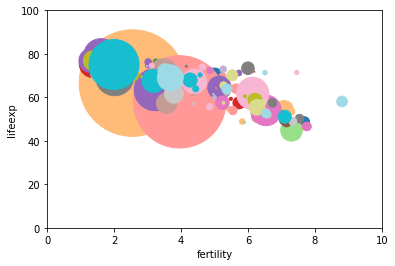

<Figure size 432x288 with 0 Axes>

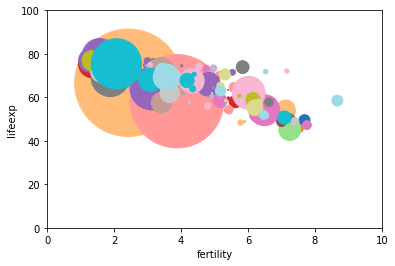

<Figure size 432x288 with 0 Axes>

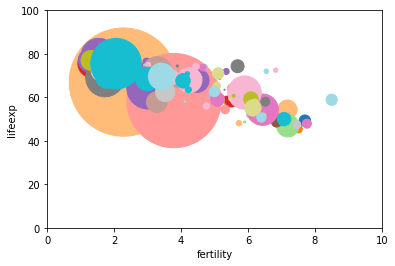

<Figure size 432x288 with 0 Axes>

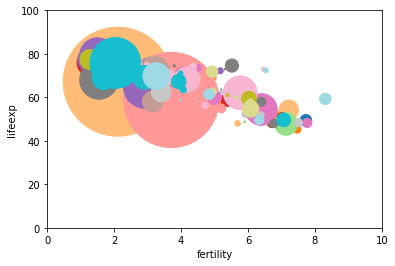

<Figure size 432x288 with 0 Axes>

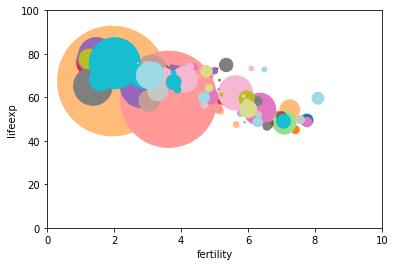

<Figure size 432x288 with 0 Axes>

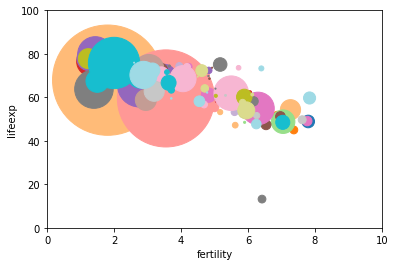

<Figure size 432x288 with 0 Axes>

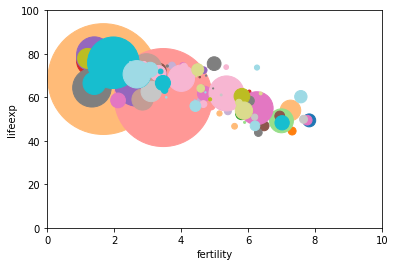

<Figure size 432x288 with 0 Axes>

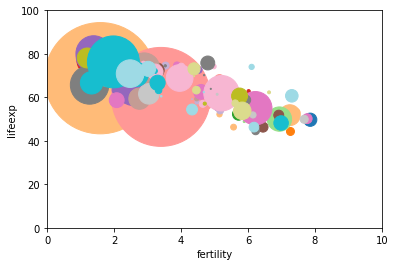

<Figure size 432x288 with 0 Axes>

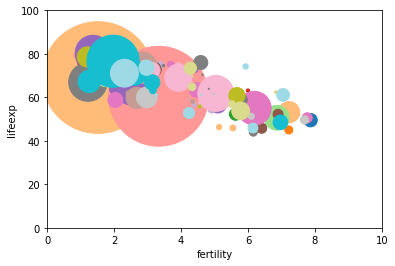

<Figure size 432x288 with 0 Axes>

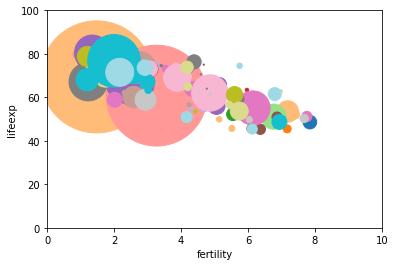

<Figure size 432x288 with 0 Axes>

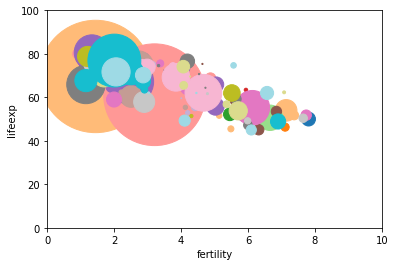

<Figure size 432x288 with 0 Axes>

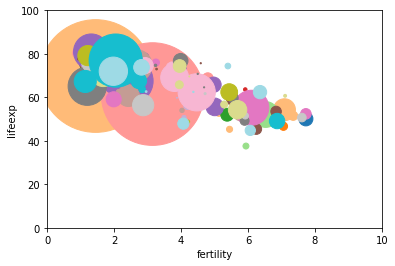

<Figure size 432x288 with 0 Axes>

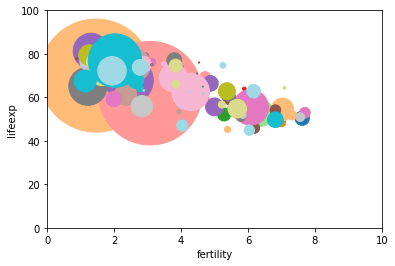

<Figure size 432x288 with 0 Axes>

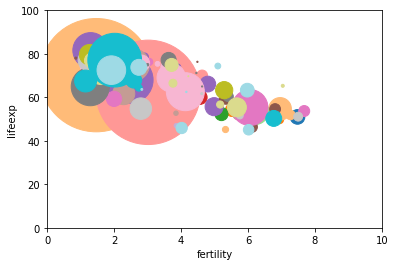

<Figure size 432x288 with 0 Axes>

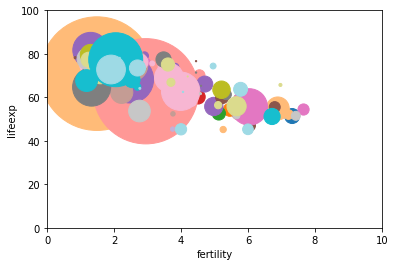

<Figure size 432x288 with 0 Axes>

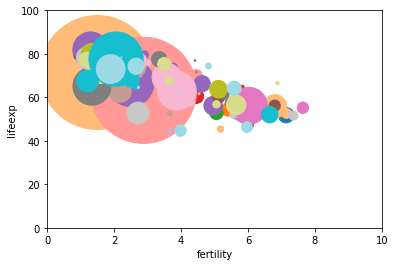

<Figure size 432x288 with 0 Axes>

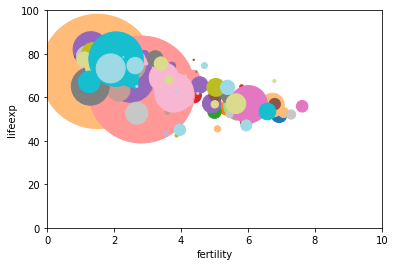

<Figure size 432x288 with 0 Axes>

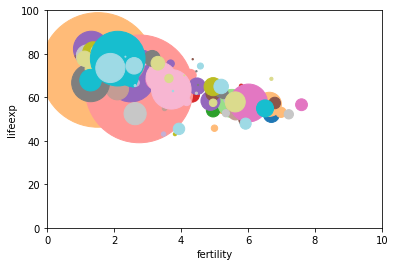

<Figure size 432x288 with 0 Axes>

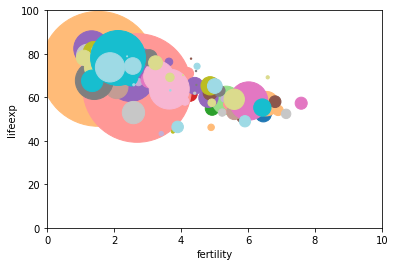

<Figure size 432x288 with 0 Axes>

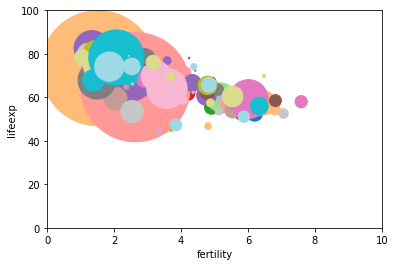

<Figure size 432x288 with 0 Axes>

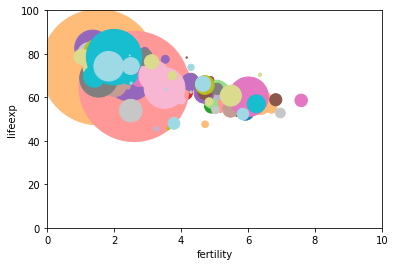

<Figure size 432x288 with 0 Axes>

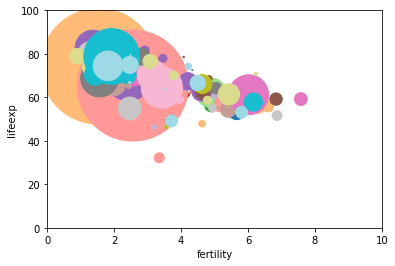

<Figure size 432x288 with 0 Axes>

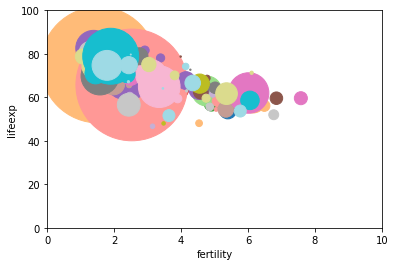

<Figure size 432x288 with 0 Axes>

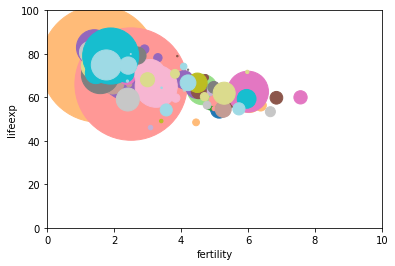

<Figure size 432x288 with 0 Axes>

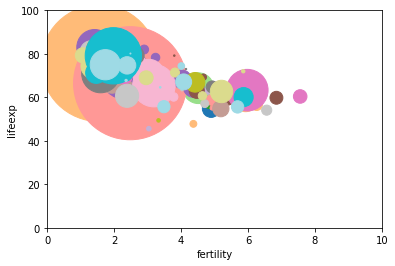

<Figure size 432x288 with 0 Axes>

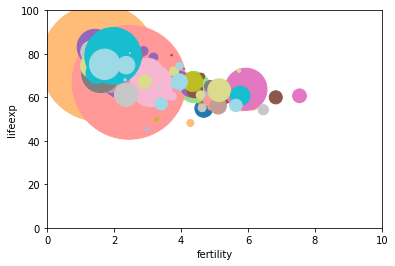

<Figure size 432x288 with 0 Axes>

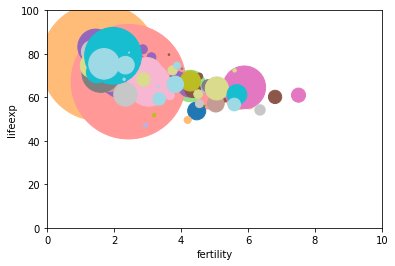

<Figure size 432x288 with 0 Axes>

In [24]:
import pandas as pd
import pylab as plt
import imageio
%matplotlib inline

fert = pd.read_csv('~/Projects/spiced/week1/plotting/gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('~/Projects/spiced/week1/plotting/gapminder_lifeexpectancy.xlsx', index_col=0)

int_columns = [int(x) for x in fert.columns]
fert.set_axis(axis=1, labels=int_columns, inplace=True)
stack_fert = fert.stack()
stack_life = life.stack()

population = pd.read_excel('~/Projects/spiced/week1/plotting/gapminder_population.xlsx', index_col=0)
stack_population = population.stack()
data2 = {'fertility': stack_fert, 'lifeexp': stack_life, 'population': stack_population}
df2 = pd.DataFrame(data2)
df3 = df2.stack()
df6 = df3.unstack(1)

images = []

for year in range(1960, 2016):
    df7 = df6[year]
    df7 = df7.unstack(1)
    cmap = plt.get_cmap('tab20', lut = len(df7)).colors
    df7.plot.scatter('fertility', 'lifeexp', s=(df7['population']/1000000)*10, c=cmap)
    plt.axis([0, 10, 0, 100])
    plt.savefig(f'lifeexp_{year}.png')
    
    ### Use imageio to read the file we just saved, convert it to an array, and append it to a list    
    im = imageio.imread(f'lifeexp_{year}.png')
    images.append(im)
    plt.figure() #creates a new empty plot every time!

In [25]:
imageio.mimsave('lifeexp_01.gif', images, fps=10)